In [17]:
from universal_datagen.generator.generator_text import AM2018TxtGenerator
from universal_datagen.generator.generator_mixed import AM2018MixedGenerator
import tensorflow as tf
import keras
from keras.callbacks import *

from utils import *
import glob

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
data_paths = ["/l/projects/data/AM2018_SIMULATION/2700/tau_20_var_150",
        "/l/projects/data/AM2018_SIMULATION/2700/tau_20_var_200",
        "/l/projects/data/AM2018_SIMULATION/2700/tau_50_var_120",
        "/l/projects/data/AM2018_SIMULATION/2700/tau_50_var_150",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_20_var_120",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_20_var_150",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_20_var_180",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_50_var_100",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_50_var_120",
        "/l/projects/data/AM2018_SIMULATION/1200/tau_50_var_150"]

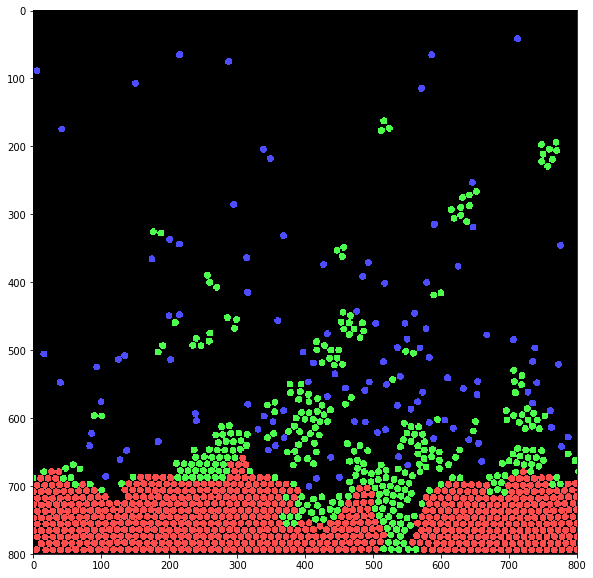

In [25]:
plt.figure(figsize=(20, len(data_paths) * 10))
for i, path in enumerate(data_paths):
    data = AM2018TxtGenerator([path, ], (800, 800, 1), (800, 800, 4))
    gen = data.iterator(structure='pair', labeled=True, cropped=False)
    
    x, y = next(gen)
    plt.subplot(len(data_paths), 1, i + 1)
    plt.imshow(np.squeeze(x), cmap='gray', interpolation=None)
    plt.imshow(y[..., 1:] * 255, cmap='jet', interpolation=None, alpha=0.7)

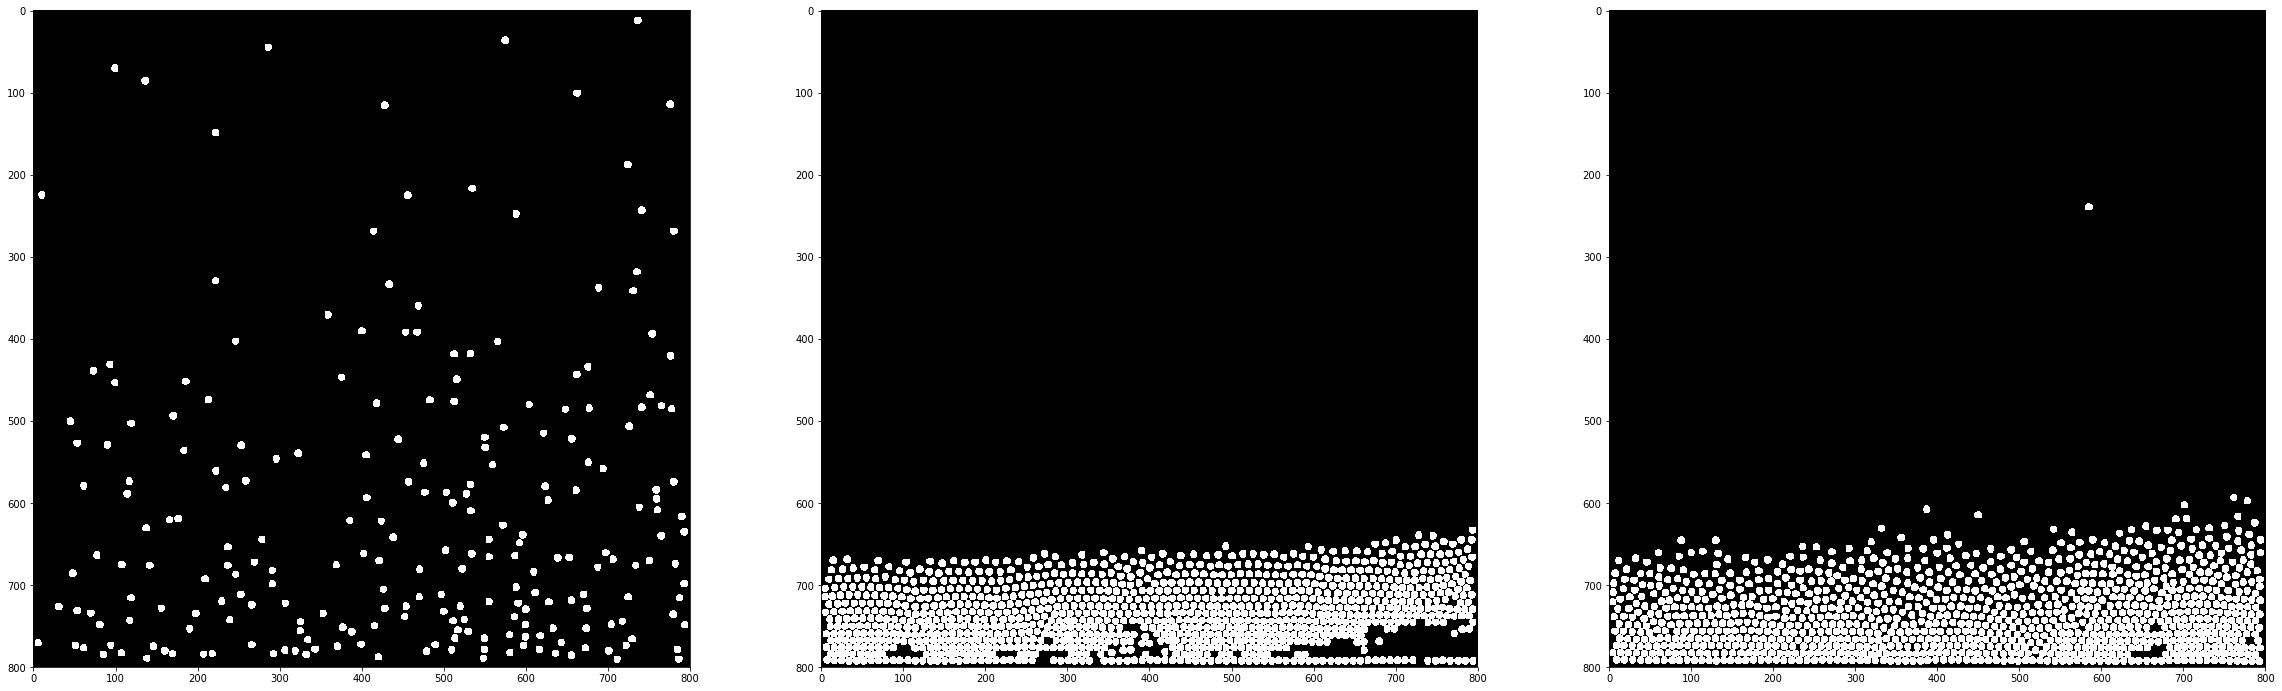

In [21]:
data_paths = ["/l/projects/data/AM2018_MIXED/0deg_-100V/",
             "/l/projects/data/AM2018_MIXED/0deg_-110V/",
             "/l/projects/data/AM2018_MIXED/0deg_-120V/",
             "/l/projects/data/AM2018_MIXED/30deg_-100V/",
             "/l/projects/data/AM2018_MIXED/60deg_-100V/",
             "/l/projects/data/AM2018_MIXED/60deg_-105V/",
             "/l/projects/data/AM2018_MIXED/60deg_-120V/",
             "/l/projects/data/AM2018_MIXED/60deg_-85V/",
              "/l/projects/data/AM2018_MIXED/60deg_-95V/",
             ]

paths = data_paths[-3:]
plt.figure(figsize=(40, 30))
for i, path in enumerate(paths):
    data = AM2018MixedGenerator([path, ], (800, 800, 1), (800, 800, 4))
    gen = data.iterator(structure='pair', labeled=True, cropped=False)
    
    x, y = next(gen)
    plt.subplot(1, len(paths), i + 1)
    #plt.imshow(np.squeeze(x), cmap='gray', interpolation=None)
    #plt.imshow(np.squeeze(y), cmap='jet', interpolation=None, alpha=0.7)
    plt.imshow(np.squeeze(y), cmap='gray', interpolation=None)

In [26]:
data_paths = ['/l/projects/data/AM2018_SIMULATION/1200/tau_20_var_120/', ]
ih, iw = 384, 384
data = AM2018TxtGenerator(data_paths, (ih, iw, 1), (ih, iw, 4))
gen = data.iterator(structure='pair', labeled=True, cropped=False)

In [27]:
def fig_to_np(fig):
    # Render into numpy array
    fig.canvas.draw()
    w, h = fig.canvas.get_width_height()
    im = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    im = np.reshape(im, (h, w, 3)) # rgb
    im = np.stack((im[..., 2], im[..., 1], im[..., 0],), axis=2) # bgr

    return im

KeyboardInterrupt: 

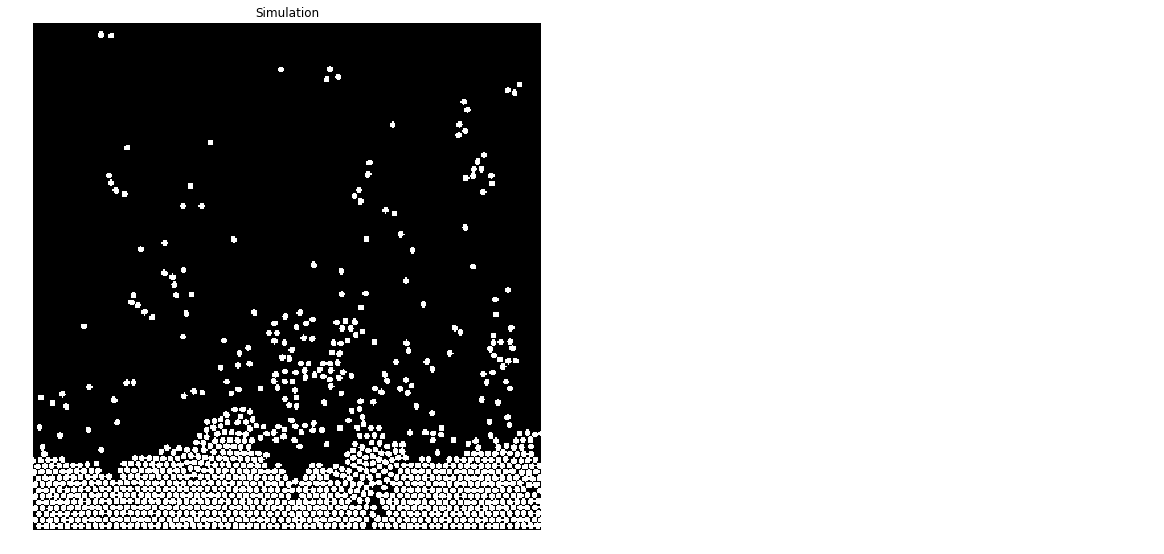

In [24]:
import cv2

fig, axes = plt.subplots(1, 2, figsize=(20, 15))
im_x, im_y = axes.ravel()

null = np.zeros((ih, iw))
im_x.set_axis_off()
im_x.imshow(null)
im_x.set_title("Simulation")

im_y.set_axis_off()
im_y.imshow(null)
im_y.set_title("Classification")

im = fig_to_np(fig)
fh, fw, _ = im.shape


fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('simulation.mp4',fourcc, 25.0, (fw, fh)) # w, h

for i, (x, y) in enumerate(gen):       
    if i > 50:
        break
    
    im_x.cla()
    im_x.set_axis_off()
    im_x.imshow(np.squeeze(x), cmap='gray')
    im_x.set_title("Simulation")

    im_y.cla()
    im_y.set_axis_off()
    im_y.imshow(y[..., 1:] * 255)
    im_y.set_title("Classification")

    # Render into numpy array
    im = fig_to_np(fig)
    out.write(im)

out.release()

In [8]:
out.release()